In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [5]:
rand_state=1000

In [6]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon.txt') 

In [7]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon.csv', index=None)

In [8]:
df = pd.read_table('AOI_hitStimuli1Polygon.csv')

In [9]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
0,Skilled,612,325,699,615,329,0
1,Skilled,609,325,699,615,329,0
2,Skilled,611,321,699,615,329,0
3,Skilled,611,324,699,615,329,0
4,Skilled,610,327,699,615,329,0


In [10]:
df.nunique()

Skill_level                   2
Gaze_point_X                836
Gaze_point_Y                850
Gaze_event_duration         131
Fixation_point_X            491
Fixation_point_Y            466
AOI_hit_Stimuli1_Polygon      2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28064 entries, 0 to 28063
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Skill_level               28064 non-null  object
 1   Gaze_point_X              28064 non-null  int64 
 2   Gaze_point_Y              28064 non-null  int64 
 3   Gaze_event_duration       28064 non-null  int64 
 4   Fixation_point_X          28064 non-null  int64 
 5   Fixation_point_Y          28064 non-null  int64 
 6   AOI_hit_Stimuli1_Polygon  28064 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [20]:
df.isna().sum()

Skill_level                 0
Gaze_point_X                0
Gaze_point_Y                0
Gaze_event_duration         0
Fixation_point_X            0
Fixation_point_Y            0
AOI_hit_Stimuli1_Polygon    0
dtype: int64

In [21]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
count,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000
mean,641.027259,301.309008,814.581564,641.770560,301.058331,0.323653
std,180.952162,158.314351,838.125717,180.162423,157.974624,0.467878
min,217.000000,-145.000000,66.000000,246.000000,-140.000000,0.000000
25%,500.000000,195.000000,266.000000,498.000000,193.000000,0.000000
50%,598.000000,263.000000,482.000000,599.000000,263.000000,0.000000
75%,775.000000,386.000000,1015.000000,777.000000,387.000000,1.000000
max,1242.000000,1628.000000,3861.000000,1238.000000,1584.000000,1.000000


<Figure size 600x400 with 0 Axes>

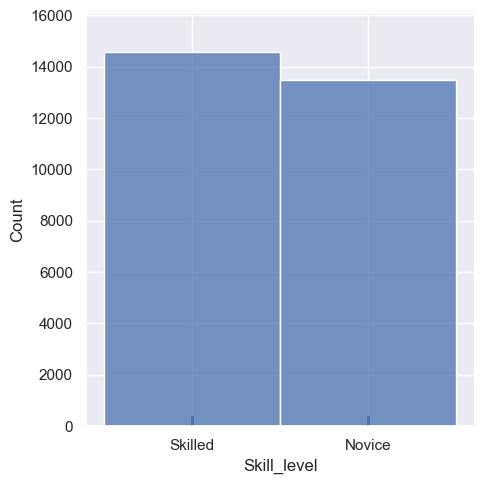

In [22]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [23]:
ordinal_categoricals = ['Skill_level']

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
enc = OrdinalEncoder()

In [26]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [27]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
0,1.0,612,325,699,615,329,0
1,1.0,609,325,699,615,329,0
2,1.0,611,321,699,615,329,0
3,1.0,611,324,699,615,329,0
4,1.0,610,327,699,615,329,0


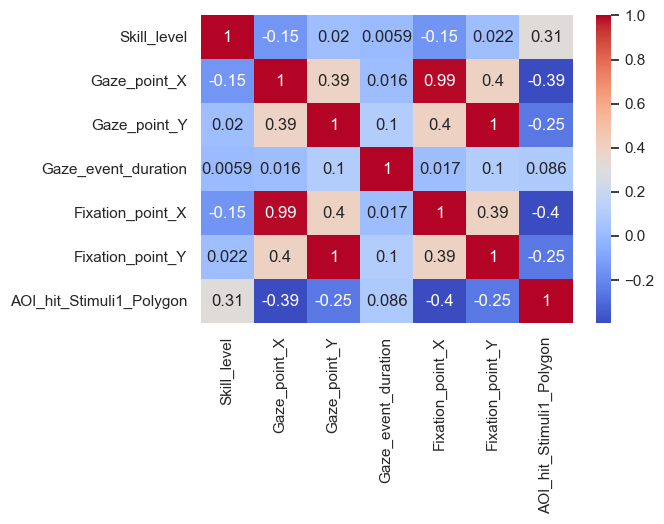

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 8.25 s
Wall time: 8.5 s


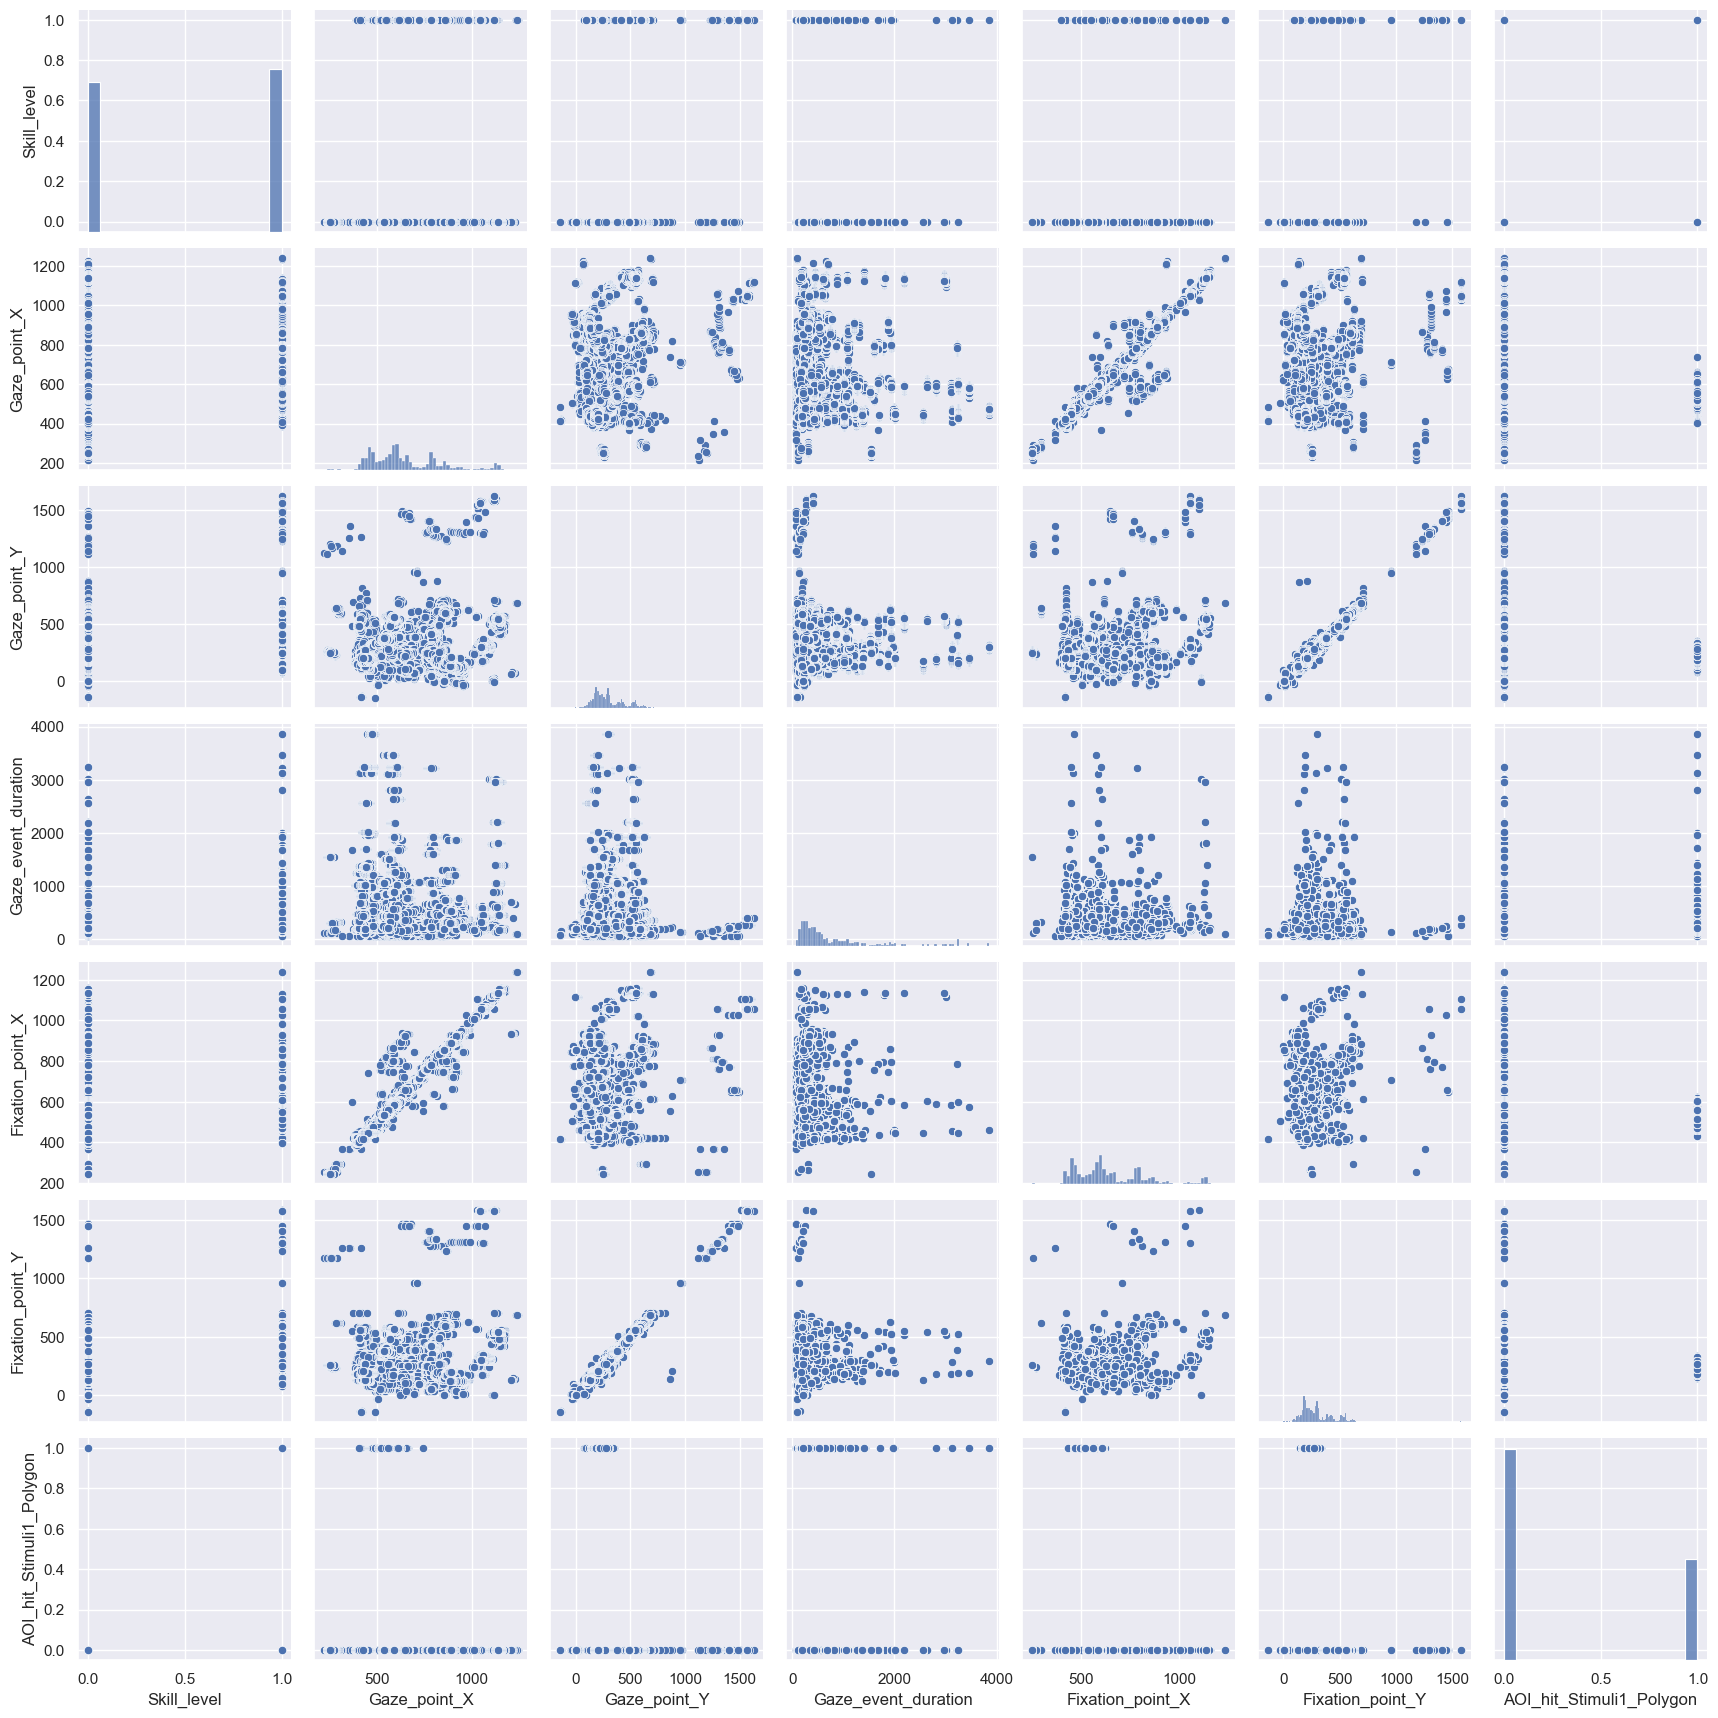

In [30]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon' ]])

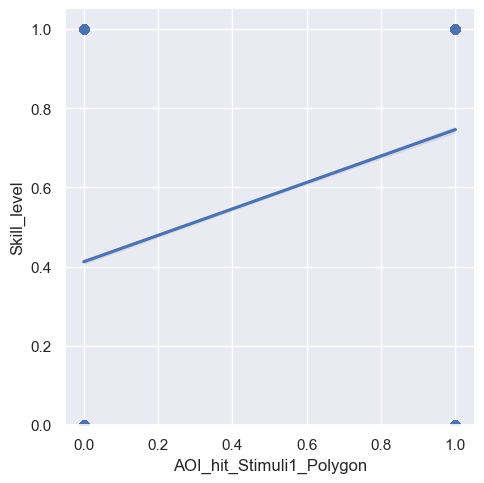

In [31]:
g= sns.lmplot(x='AOI_hit_Stimuli1_Polygon', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

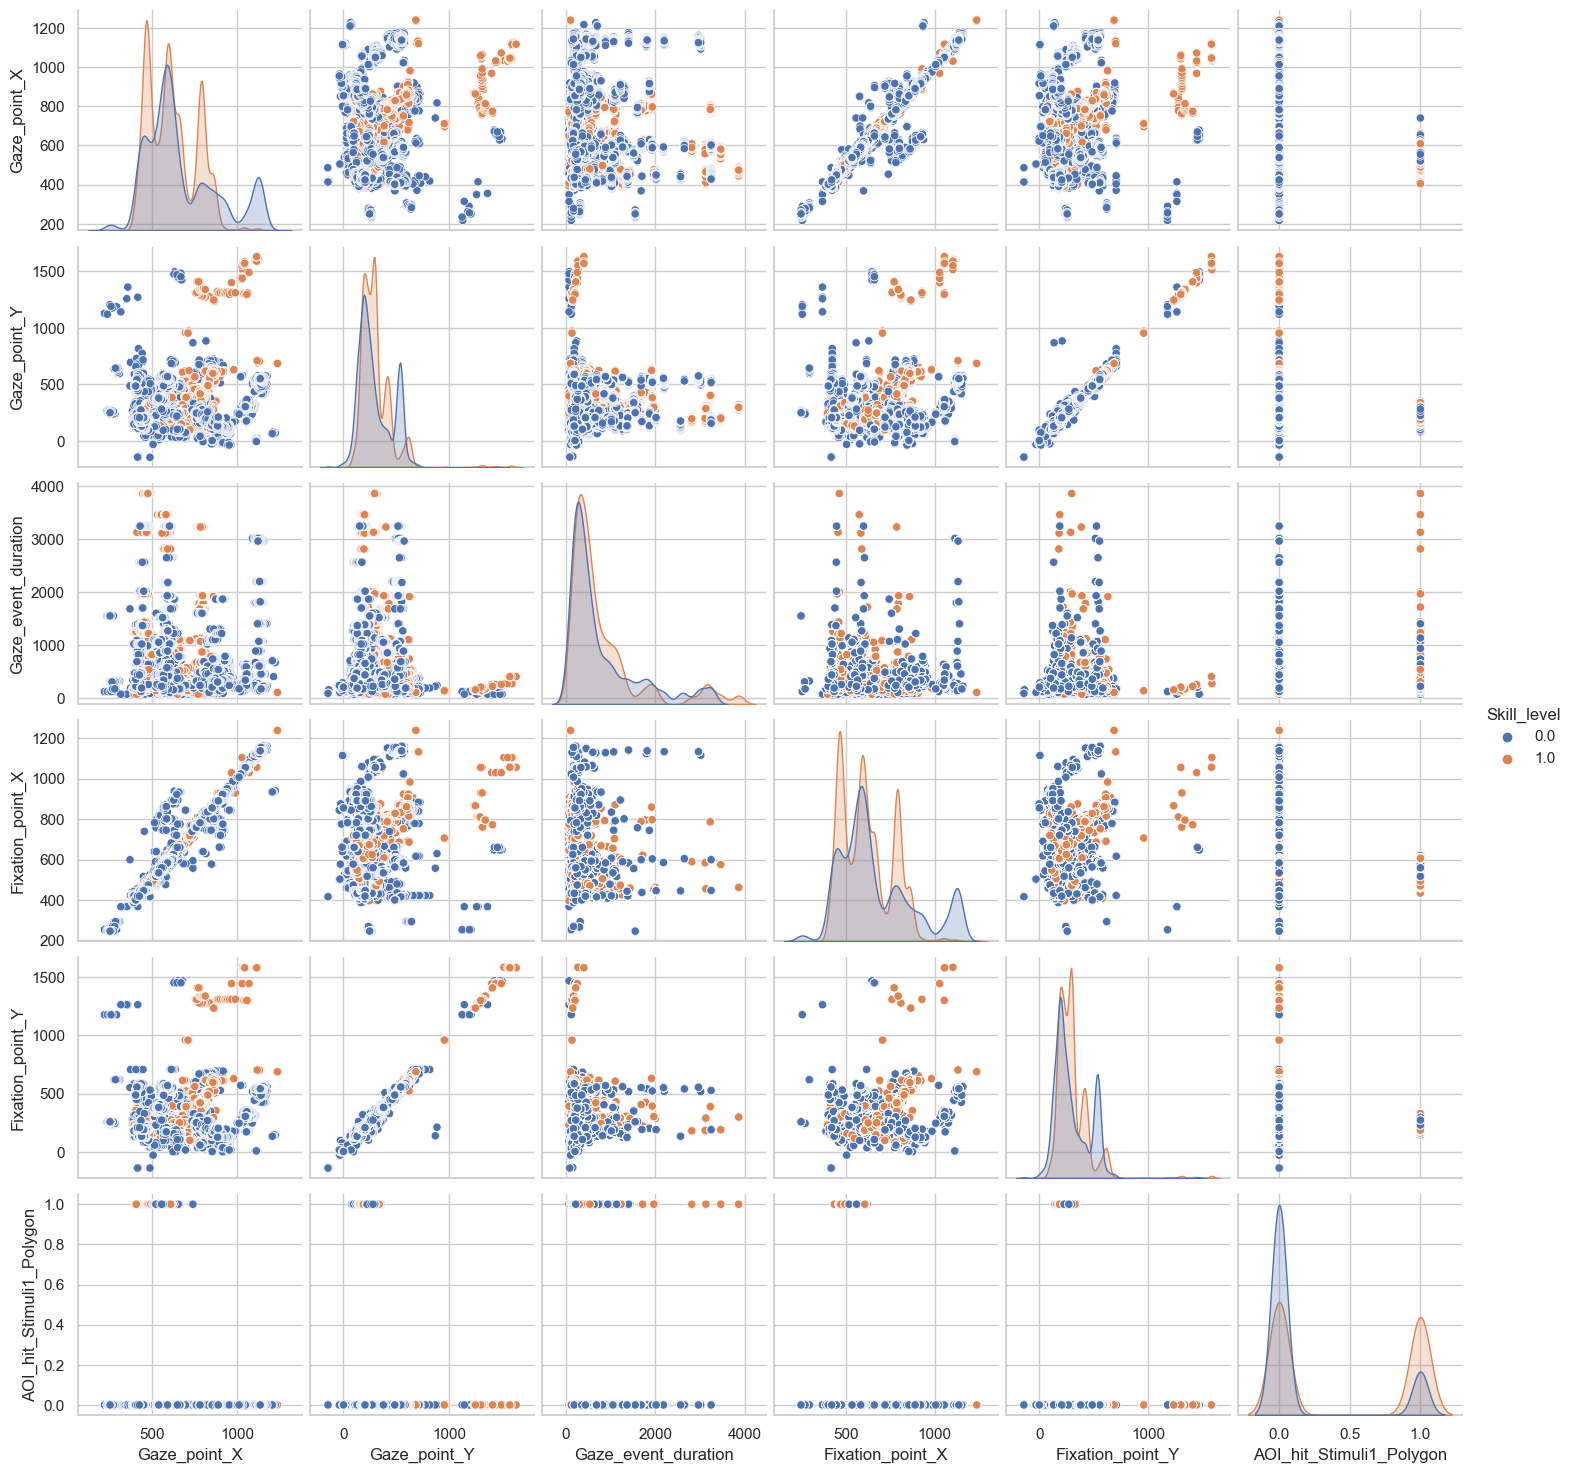

In [32]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [33]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [34]:
reg_model = LinearRegression()


In [35]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon
9749,715,394,233,718,395,0
23547,1137,529,1065,1132,531,0
14035,488,250,1215,473,290,1
25569,597,539,2646,604,540,0
25923,553,374,1514,555,350,0


In [36]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_hat = reg_model.predict(X_test)

In [38]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
11556,1.0,0.367042,0.632958
13654,1.0,0.471644,0.528356
8950,0.0,0.511270,-0.511270
22803,0.0,0.363883,-0.363883
24894,0.0,0.472280,-0.472280


In [39]:
reg_model.coef_

array([ 3.01714101e-04, -8.03668955e-05, -1.95555416e-05, -5.35797045e-04,
        5.12786874e-04,  3.32263424e-01])

In [40]:
reg_model.intercept_

0.4472931606222896

In [41]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,0.0003
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,-0.0000
3,Fixation_point_X,-0.0005
4,Fixation_point_Y,0.0005
5,AOI_hit_Stimuli1_Polygon,0.3323


In [42]:
reg_model.score(X_train, y_train)

0.11213049760956173

In [43]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.112
Test data R-squared: 0.112


In [44]:
X_train.shape

(22451, 6)

In [45]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [46]:
adj_R2(X_train, y_train)

0.112

In [47]:
adj_R2(X_test, y_test)

0.124

In [48]:
df_predictions.head()

,actuals,predictions,resid
11556,1.0,0.367042,0.632958
13654,1.0,0.471644,0.528356
8950,0.0,0.511270,-0.511270
22803,0.0,0.363883,-0.363883
24894,0.0,0.472280,-0.472280


In [49]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.218

In [50]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.467

In [51]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [52]:
my_estimator = LinearRegression()

In [53]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [54]:
R2

array([0.1040545 , 0.11283959, 0.12005378, 0.11187835, 0.10952506])

In [55]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.112

In [59]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [61]:
MSE = -NMSE
MSE

array([0.22388189, 0.2214796 , 0.21964854, 0.22156305, 0.22209395])

In [62]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.222

In [63]:
RMSE = np.sqrt(MSE)
RMSE

array([0.47316158, 0.47061619, 0.46866677, 0.47070484, 0.47126845])